<a href="https://colab.research.google.com/github/ElZho/ElZho/blob/main/Find_Froud_05_02_CatB_v5_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Выбран кодовый формат
```

**Вариант 5.1**
* 1. Убираем список столбцов: 'id_07', 'id_08', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_23',  'id_27' (baseline)
* 2. Убираем столбцы, которые убрали после 2-й попытки - показавшие 0 в feature_importance и также имеющие высокие коэффициенты корреляции
* 3. Добавляем 3 столбца: сгруппированная карта, сгруппированный адрес, сгруппированный dist.
* 4. Убираем столбцец D9 - столбец со временем операции
* 5. Добавляем столбец с часами операции, вычисленными из TransactionDT, а также добавим день, вычисленный из TransactionDT
*  6.Удаляем TransactionDT



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [2]:
import gc
import sys

In [3]:
path_to_data = '/content/drive/MyDrive/Classroom/list_off_02_02.csv'
list_off= pd.read_csv(path_to_data)

In [ ]:
list_off

,feature,importance
0,V17,0.0
1,V18,0.0
2,V21,0.0
3,V22,0.0
4,V31,0.0
...,...,...
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN


In [4]:
feat_out= ['id_07', 'id_08', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26',
          'id_23',  'id_27', 'D9']

In [5]:
addr_feature=['addr1', 'addr2']
card_feature=['card1', 'card2','card3', 'card4', 'card5', 'card6']
identity_feature= ['id_12','id_13', 'id_14', 'id_15', 'id_16', 'id_17',
                  'id_18', 'id_19', 'id_20', 'id_21', 'id_22',               
                  'id_23', 'id_27', 'id_28', 'id_29', 
                  'id_30', 'id_31', 'id_33', 'id_34',
                  'id_35', 'id_36', 'id_37', 'id_38']

In [6]:
feature_m=['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [7]:
features_cat_itog=['ProductCD', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo']
features_cat_itog=features_cat_itog+addr_feature+card_feature+identity_feature+feature_m

In [8]:
numeric_features_itog=['TransactionID', 'TransactionDT', 'TransactionAmt', 'dist1',
                  'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
                  'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
                  'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
                  'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                  'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
                  'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
                  'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36',
                  'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45',
                  'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54',
                  'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63',
                  'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72',
                  'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
                  'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90',
                  'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99',
                  'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107',
                  'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115',
                  'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123',
                  'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131',
                  'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139',
                  'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
                  'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155',
                  'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163',
                  'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171',
                  'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179',
                  'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187',
                  'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
                  'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203',
                  'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211',
                  'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
                  'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227',
                  'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235',
                  'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243',
                  'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251',
                  'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259',
                  'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267',
                  'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275',
                  'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283',
                  'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291',
                  'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299',
                  'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307',
                  'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315',
                  'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323',
                  'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331',
                  'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']

In [9]:
feature_cat_for_cat=features_cat_itog.copy()
feature_cat_for_cat.extend(['card_card', 'dist', 'addr'])

In [10]:
# columns to convert to integer
column_to_int=['addr1', 'addr2', 'card2', 'card3', 'id_13','card5', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20']

In [11]:
feature_to_use=numeric_features_itog+features_cat_itog
for col in list_off:
  if col in feature_to_use:
    feature_to_use.remove(col)
  if col in numeric_features_itog:
    numeric_features_itog.remove(col)
  if col in features_cat_itog:
    features_cat_itog.remove(col)  
  if col in feature_cat_for_cat:
    feature_cat_for_cat.remove(col)
for col in feat_out:
  if col in column_to_int:
    column_to_int.remove(col)
  if col in feature_to_use:
    feature_to_use.remove(col)
  if col in numeric_features_itog:
    numeric_features_itog.remove(col)
  if col in features_cat_itog:
    features_cat_itog.remove(col)  
  if col in column_to_int:
    column_to_int.remove(col)
  if col in feature_cat_for_cat:
    feature_cat_for_cat.remove(col)         

In [12]:
# create some new feature
def add_feature(data):
  #groupe card data in one
  data['card_card']=data['card1'].astype(str)+\
                             data['card2'].astype(str) +\
                             data['card3'].astype(str)+\
                             data['card4']+data['card6']+\
                             data['card5'].astype(str)
  # group dist in one
  data['dist']=data['dist1'].astype(str)+data['dist2'].astype(str) 
  # group address in one
  data['addr']=data['addr1'].astype(str)+data['addr2'].astype(str) 
  #create  hour column
  data["Hr"] = data["TransactionDT"]/(60*60)%24//1/24
  #create  day column
  data['day']=data["TransactionDT"]/(60*60)%24//1
  data.drop(columns='TransactionDT', inplace=True)
  return data                            

In [34]:
# clean some categorical columns
def clean_columns(data):
  for col in column_to_int:
    if data[col].dtype==np.float:
      data[col]=data[col].apply(lambda x: '{0:.0f}'.format(x))
  for col in feature_cat_for_cat:
    data[col].fillna(' ', inplace=True)
    data[col].replace('nan', ' ', inplace=True)
  return data  
  

In [44]:
f=numeric_features_itog
f.remove('TransactionDT')

In [42]:
#downcast some numeric columns
def downcasting_num_columns(data):
  
  for col in f:
    if data[col].dtype==float:
      # downcasting a float column
      data[col] = pd.to_numeric(data[col], downcast='float')
    elif  data[col].dtype==int: 
      # downcasting an integer column
      data[col] = pd.to_numeric(data[col], downcast='unsigned')
  return data   

In [ ]:
# for col in f:
#   X[col].replace('nan', ' ', inplace=True)
#   X_test[col].replace('nan', ' ', inplace=True)

In [16]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_full_isFraud_03_02_reduced.csv'
X = pd.read_csv(path_to_data,  usecols=feature_to_use)
X.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D10,D11,...,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,13.0,13.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,315.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,84.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [17]:
X=add_feature(X)

In [18]:
X=clean_columns(X)

In [19]:
X[column_to_int]

,addr1,addr2,card2,card3,id_13,card5,id_14,id_17,id_18,id_19,id_20
0,315,87,,150,,142,,,,,
1,325,87,404,150,,102,,,,,
2,330,87,490,150,,166,,,,,
3,476,87,567,150,,117,,,,,
4,420,87,514,150,,102,-480,166,,542,144
...,...,...,...,...,...,...,...,...,...,...,...
590535,272,87,,150,,226,,,,,
590536,204,87,225,150,,224,,,,,
590537,231,87,595,150,,224,,,,,
590538,387,87,481,150,,224,,,,,


In [20]:
X[feature_m]

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,,,
1,,,,M0,T,T,,,
2,T,T,T,M0,F,F,F,F,F
3,,,,M0,T,F,,,
4,,,,,,,,,
...,...,...,...,...,...,...,...,...,...
590535,T,T,T,M0,T,F,F,F,T
590536,T,F,F,M0,F,T,F,F,F
590537,T,F,F,,,T,,,
590538,T,T,T,M0,F,T,,,


In [21]:
gc.collect()

184

In [25]:
X=downcasting_num_columns(X)

In [ ]:
sys.getsizeof(X) / 1024 ** 2

2306.201192855835

In [26]:
from sklearn.model_selection import cross_val_score, train_test_split

In [28]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_full_isFraud_03_02_reduced.csv'
y = pd.read_csv(path_to_data,  usecols=['isFraud'])
y.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


In [29]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y,
                                              test_size=0.25, random_state=42)

In [30]:
del X
gc.collect()

163

In [31]:
path_to_data = '/content/drive/MyDrive/Classroom/data_test_isFraud_03_02_reduced.csv'
X_test = pd.read_csv(path_to_data,  usecols=feature_to_use)
X_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D10,D11,...,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,203.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,634.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,136.0,136.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,242.0,242.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,22.0,22.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
X_test=add_feature(X_test)

In [35]:
X_test=clean_columns(X_test)

In [ ]:
X_test[column_to_int]

In [ ]:
X_test[feature_m]

In [38]:
gc.collect()

439

In [39]:
sys.getsizeof(X_test) / 1024 ** 2

2695.0375566482544

In [45]:
X_test=downcasting_num_columns(X_test)

In [46]:
sys.getsizeof(X_test) / 1024 ** 2

1977.9417581558228

In [47]:
ID=X_test['TransactionID']
ID.to_csv('/content/drive/MyDrive/Classroom/ID_05_02.csv', index=False)

#CatBoost

In [49]:
!pip install -q catboost shap

     |████████████████████████████████| 76.1 MB 1.5 MB/s 
     |████████████████████████████████| 564 kB 42.8 MB/s 


In [50]:
import catboost
from catboost import CatBoostRegressor

import shap
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
gc.collect()

88

In [52]:
train_pool = catboost.Pool(
    X_train,
    label=y_train,
    cat_features=feature_cat_for_cat
)
val_pool = catboost.Pool(
    X_validate,
    label=y_validate,
    cat_features=feature_cat_for_cat
)
test_pool = catboost.Pool(
    X_test,
    cat_features=feature_cat_for_cat
)

In [54]:
!rm -rf 'catboost_clf_find_fraud/snapshot.bkp'

In [55]:
catboost_train_dir = 'catboost_clf_find_fraud'
clf = catboost.CatBoostClassifier(
    eval_metric='AUC',
    od_pval=0.05,
    od_wait=20,
    # early_stopping_rounds=20,
    random_seed=52,
    train_dir=catboost_train_dir,
    # task_type='CPU',
    task_type='GPU',
    devices='0',
    auto_class_weights='Balanced',
    use_best_model=True
)
clf.fit(
    train_pool, 
    eval_set=val_pool,
    plot=True,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.042422
0:	learn: 0.8434737	test: 0.8529460	best: 0.8529460 (0)	total: 473ms	remaining: 7m 52s
1:	learn: 0.8479683	test: 0.8579989	best: 0.8579989 (1)	total: 885ms	remaining: 7m 21s
2:	learn: 0.8480529	test: 0.8588283	best: 0.8588283 (2)	total: 1.29s	remaining: 7m 7s
3:	learn: 0.8495231	test: 0.8592567	best: 0.8592567 (3)	total: 1.7s	remaining: 7m 3s
4:	learn: 0.8601182	test: 0.8683679	best: 0.8683679 (4)	total: 2.12s	remaining: 7m 1s
5:	learn: 0.8671536	test: 0.8769312	best: 0.8769312 (5)	total: 2.57s	remaining: 7m 5s
6:	learn: 0.8719442	test: 0.8816095	best: 0.8816095 (6)	total: 3.02s	remaining: 7m 9s
7:	learn: 0.8728953	test: 0.8822721	best: 0.8822721 (7)	total: 3.47s	remaining: 7m 9s
8:	learn: 0.8741380	test: 0.8835302	best: 0.8835302 (8)	total: 3.92s	remaining: 7m 12s
9:	learn: 0.8760024	test: 0.8857948	best: 0.8857948 (9)	total: 4.39s	remaining: 7m 14s
10:	learn: 0.8791313	test: 0.8893055	best: 0.8893055 (10)	total: 4.86s	remaining: 7m 16s
11:	learn: 0.88131

In [56]:
gc.collect()

439

Предсказываем

In [57]:
vt_pool = catboost.Pool(
    X_validate,
    cat_features=feature_cat_for_cat
    )  

tt_pool = catboost.Pool(
    X_train,
    cat_features=feature_cat_for_cat
) 
y_pred_train = clf.predict(tt_pool)
y_pred_val = clf.predict(vt_pool)
y_pred_submit = clf.predict(test_pool)

In [58]:
gc.collect()

269

Сохраняем результат

In [59]:
y_pred_submit_res=pd.DataFrame(zip(ID, y_pred_submit), columns=['TransactionID','isFraud'])

In [60]:
y_pred_submit_res

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0


In [61]:
y_pred_submit_res.to_csv('/content/drive/MyDrive/Classroom/submit_isFraud_05_02_try5_1.csv', index=False)

In [ ]:
y.sum()/y.shape[0]

isFraud    0.03499
dtype: float64

In [62]:
y_pred_submit_res.isFraud.sum()/y_pred_submit_res.shape[0]

0.09915313277717583

#Анализируем результат

In [63]:
gc.collect()

533

График обучения

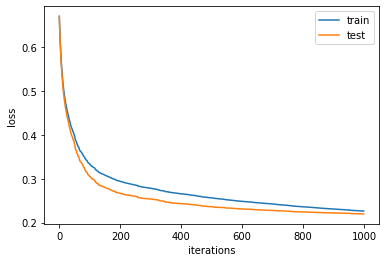

In [64]:
hist = clf.get_evals_result()
plt.plot(list(hist['learn'].values())[0], label= 'train')
plt.plot(list(hist['validation'].values())[0], label = 'test')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend()
plt.show()

In [65]:
feature_import=sorted(
    zip(X_train.columns, clf.feature_importances_), 
    key=lambda p: p[1], 
    reverse=True
)

Сохраняем feature_import

In [66]:
feature_import

[('C1', 6.866290696356674),
 ('card1', 4.932523846842089),
 ('card_card', 4.77772662719201),
 ('TransactionAmt', 4.351297018847598),
 ('C14', 4.087759275525005),
 ('P_emaildomain', 3.5036370912965773),
 ('C13', 3.365440954553114),
 ('addr1', 3.3095196255607977),
 ('dist', 2.584976535428955),
 ('M5', 2.4910014181368467),
 ('D2', 2.4556030014190067),
 ('TransactionID', 2.4520087320324917),
 ('card2', 2.299669475785124),
 ('M6', 2.045661007634975),
 ('R_emaildomain', 1.7898411146873783),
 ('C5', 1.5860067574641894),
 ('C6', 1.569837923733076),
 ('DeviceInfo', 1.5543027159536806),
 ('V258', 1.4132439659819624),
 ('M4', 1.4119578710952416),
 ('C11', 1.3570505153746877),
 ('id_19', 1.3165532530891604),
 ('D15', 1.2753334652592994),
 ('V308', 1.2679731983453604),
 ('ProductCD', 1.1575017160373622),
 ('dist1', 0.974308582118621),
 ('D11', 0.9673227683688209),
 ('D8', 0.8551477675258811),
 ('D5', 0.8305055589103882),
 ('D4', 0.8287752003379243),
 ('V294', 0.8011653533955321),
 ('id_31', 0.79123

In [67]:
feature_import=pd.DataFrame(feature_import, columns=['feature', 'importance'])

In [68]:
feature_import.to_csv('/content/drive/MyDrive/Classroom/feature_import_05_02_v5.csv', index=False)

In [69]:
del X_test
gc.collect()

2967

In [70]:
gc.collect()

131

In [ ]:
shap_info = clf.get_feature_importance(
    data=train_pool, 
    type='ShapValues', 
    verbose=10000
)
shap_values = shap_info[:,:-1]
base_values = shap_info[:,-1]

Processing trees...
128/997 trees processed	passed time: 310ms	remaining time: 2.1s
997/997 trees processed	passed time: 2.24s	remaining time: 0us
Processing documents...
128/442905 documents processed	passed time: 29ms	remaining time: 1m 40s
10112/442905 documents processed	passed time: 2.06s	remaining time: 1m 28s
20096/442905 documents processed	passed time: 4.05s	remaining time: 1m 25s
30080/442905 documents processed	passed time: 6.07s	remaining time: 1m 23s
40064/442905 documents processed	passed time: 8.1s	remaining time: 1m 21s
50048/442905 documents processed	passed time: 10.1s	remaining time: 1m 19s
60032/442905 documents processed	passed time: 12.1s	remaining time: 1m 17s
70016/442905 documents processed	passed time: 14.1s	remaining time: 1m 15s
80128/442905 documents processed	passed time: 16.2s	remaining time: 1m 13s
90112/442905 documents processed	passed time: 18.3s	remaining time: 1m 11s
100096/442905 documents processed	passed time: 20.3s	remaining time: 1m 9s
110080/4

In [ ]:
/content/catboost_clf_find_fraud/snapshot.bkp

In [ ]:
shap.summary_plot(shap_values, X_train)